In [33]:
def bumpM(x,x0,M):
    d = (x - x0).T @ M @ (x - x0)
    b = np.zeros((d.shape)) 
    a = 1.0-d
    if a < 0: return 0.0 
    else: return np.exp(-1.0/a) * np.exp(1.0)

def bump_derM(x,x0,M):
    d = (x - x0).T @ M @ (x - x0)
    d2= (x - x0)
    gr = np.zeros((d2.shape)) 
    a = 1.0-d
    if a < 0: return 0.0
    else: return ((-2.0*d2)/(a**2)) * np.exp(-1.0/a) * np.exp(1.0)

In [34]:
def bump(x,x0,r):
    d = np.sqrt((x - x0).T @ (x - x0))
    b = np.zeros((d.shape)) 
    a = 1.0-(d**2/r**2)
    if a <= 0: return 0.0 
    else: return np.exp(-1.0/a) * np.exp(1.0)

def bump_der(x,x0,r):
    d = np.sqrt((x - x0).T @ (x - x0))
    d2= (x - x0)
    gr = np.zeros((d2.shape)) 
    a = 1.0-(d**2/r**2)
    if a <= 0: return np.zeros((len(x)))
    else: return (bump(x,x0,r) * ((-2.0*d2)/(a**2))) /r**2

In [35]:
import numpy as np
import matplotlib.pyplot as plt

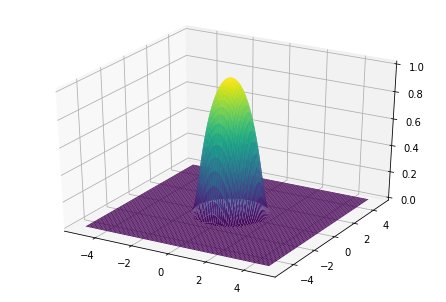

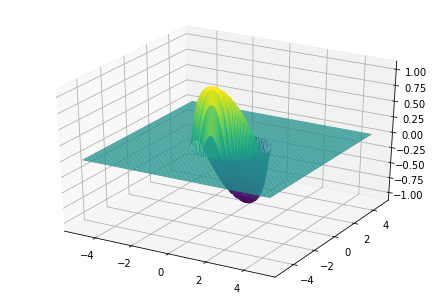

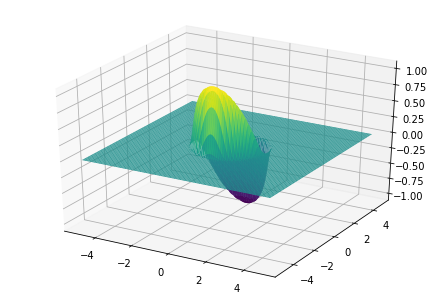

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
b = np.empty((X.shape))
g = np.empty((len(X),len(X),2))
x = np.empty((len(X)**2,2))
x0= np.zeros((2,2))
x0 = np.array([0,0])
index = 0 
M = np.zeros((2,2))
M[0,0] = 1.0
M[1,1] = 5.0
r = 2.0
for i in range(len(X)):
    for j in range(len(Y)):
        x[index,0] = X[i,j]
        x[index,1] = Y[i,j]
        b[i,j] = bump(x[index],x0,r)
        g[i,j] = bump_der(x[index],x0,r)
        index += 1

#der = bump_der(x,x0,1.0)
#B = np.empty((X.shape))
#D = np.empty((X.shape))
#index = 0 
#for i in range(len(X)):
#    for j in range(len(Y)):
#        B[i,j] = b[index]
#        D[i,j] = der[index,1]
#        index += 1

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, b, rstride=1, cstride=1, cmap=cm.viridis)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, g[:,:,1] , rstride=1, cstride=1, cmap=cm.viridis)#plt.show()

fig = plt.figure()
ax = Axes3D(fig)
gx,gy = np.gradient(b,0.1,0.1)
ax.plot_surface(X, Y, gx, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()